In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import shutil
from shutil import copyfile
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
# Path ke dataset
source_path = '/content/drive/MyDrive/asl_dataset'

# List untuk menyimpan nama kelas (huruf A-Z)
class_names = [chr(i) for i in range(ord('a'), ord('z') + 1)]  # Membuat list ['A', 'B', 'C', ..., 'Z']

# Iterasi untuk setiap direktori dalam source_path
for i in class_names:
    source_path_item = os.path.join(source_path, i)

    # Inisialisasi penghitung jumlah gambar yang diproses
    n = 0

    # Cek setiap file dalam direktori kelas
    for j in os.listdir(source_path_item):
        file_path = os.path.join(source_path_item, j)

        # Proses hanya file dengan ekstensi .jpg atau .gif
        if j.lower().endswith(("jpg", "gif")):
            try:
                # Buka gambar, konversi ke RGB (agar tidak ada masalah dengan format yang berbeda)
                im = Image.open(file_path).convert("RGB")

                # Simpan gambar sebagai JPEG (ubah ekstensi)
                new_file_path = os.path.join(source_path_item, j[:-3]+'jpeg')
                im.save(new_file_path)

                # Hapus file gambar asli
                os.remove(file_path)

                # Tambah penghitung untuk gambar yang berhasil dikonversi
                n += 1
            except Exception as e:
                print(f"Error saat memproses {j}: {e}")

    print("Konversi Berhasil")
    print(f"Gambar yang dikonversi = {n}")
    print(f"Tersisa {len(os.listdir(source_path_item))} gambar di {i}.\n")

# Menampilkan nama kelas dalam dataset
print("Kelas dalam dataset:", class_names)


Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di a.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di b.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di c.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di d.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di e.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di f.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di g.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di h.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di i.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di j.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di k.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di l.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di m.

Konversi Berhasil
Gambar yang dikonversi = 0
Tersisa 70 gambar di n.

Konversi Berhasil
Ga

In [ ]:
# Path ke root dataset
root_dir = 'asl_dataset'

# Membuat direktori utama untuk train, validation, dan test
if not os.path.exists(root_dir):
    os.makedirs(root_dir)

train_dir = os.path.join(root_dir, "train")
val_dir = os.path.join(root_dir, "validation")
test_dir = os.path.join(root_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# Fungsi untuk membagi data ke dalam train, validation, dan test
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, TEST_DIR, TRAIN_SPLIT, VAL_SPLIT):
    # Ambil semua file dalam direktori
    all_files = [f for f in os.listdir(SOURCE_DIR) if os.path.isfile(os.path.join(SOURCE_DIR, f))]
    random.shuffle(all_files)  # Acak file

    # Hitung batas untuk setiap subset
    train_size = int(len(all_files) * TRAIN_SPLIT)
    val_size = int(len(all_files) * VAL_SPLIT)

    # Bagikan file ke setiap subset
    train_files = all_files[:train_size]
    val_files = all_files[train_size:train_size + val_size]
    test_files = all_files[train_size + val_size:]

    # Fungsi untuk menyalin file ke direktori target
    def copy_files(file_list, target_dir):
        os.makedirs(target_dir, exist_ok=True)
        for file in file_list:
            source_path = os.path.join(SOURCE_DIR, file)
            if os.path.getsize(source_path) == 0:
                print(f'{file} is zero length, so ignoring.')
            else:
                copyfile(source_path, os.path.join(target_dir, file))

    # Salin file ke masing-masing direktori
    copy_files(train_files, TRAINING_DIR)
    copy_files(val_files, VALIDATION_DIR)
    copy_files(test_files, TEST_DIR)

In [ ]:
# Membersihkan direktori jika sudah ada file sebelumnya
def clear_directory(directory):
    if os.path.exists(directory):
        # shutil.rmtree can remove directories and their contents
        shutil.rmtree(directory)
        os.makedirs(directory)  # Recreate the directory if needed

clear_directory(train_dir)
clear_directory(val_dir)
clear_directory(test_dir)

# Membagi dataset ke dalam train, validation, dan test
train_split = 0.7
val_split = 0.2  # Sisanya akan otomatis masuk ke test
source_path = '/content/drive/MyDrive/asl_dataset'
class_names = [chr(i) for i in range(ord('a'), ord('z') + 1)]  # List nama kelas (a-z)

for class_name in class_names:
    split_data(
        SOURCE_DIR=os.path.join(source_path, class_name),
        TRAINING_DIR=os.path.join(train_dir, class_name),
        VALIDATION_DIR=os.path.join(val_dir, class_name),
        TEST_DIR=os.path.join(test_dir, class_name),
        TRAIN_SPLIT=train_split,
        VAL_SPLIT=val_split
    )
    print(f"Split {class_name} Successful")
    print(f"There are {len(os.listdir(os.path.join(train_dir, class_name)))} images of {class_name} for training.")
    print(f"There are {len(os.listdir(os.path.join(val_dir, class_name)))} images of {class_name} for validation.")
    print(f"There are {len(os.listdir(os.path.join(test_dir, class_name)))} images of {class_name} for testing.\n")

Split a Successful
There are 49 images of a for training.
There are 14 images of a for validation.
There are 7 images of a for testing.

Split b Successful
There are 49 images of b for training.
There are 14 images of b for validation.
There are 7 images of b for testing.

Split c Successful
There are 49 images of c for training.
There are 14 images of c for validation.
There are 7 images of c for testing.

Split d Successful
There are 49 images of d for training.
There are 14 images of d for validation.
There are 7 images of d for testing.

Split e Successful
There are 49 images of e for training.
There are 14 images of e for validation.
There are 7 images of e for testing.

Split f Successful
There are 49 images of f for training.
There are 14 images of f for validation.
There are 7 images of f for testing.

Split g Successful
There are 49 images of g for training.
There are 14 images of g for validation.
There are 7 images of g for testing.

Split h Successful
There are 49 images of

In [ ]:
# Path ke direktori train, validation, dan test
TRAINING_DIR = "/content/asl_dataset/train"
VALIDATION_DIR = "/content/asl_dataset/validation"
TESTING_DIR = "/content/asl_dataset/test"

# Fungsi untuk menghasilkan generator data train, validation, dan test
def train_val_test_generators(TRAINING_DIR, VALIDATION_DIR, TESTING_DIR):
    # Augmentasi data untuk training
    train_data = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Generator untuk data training
    train_generator = train_data.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=16,
        class_mode='categorical',
        target_size=(71, 71)
    )

    # Rescaling data untuk validation (tanpa augmentasi)
    validation_data = ImageDataGenerator(rescale=1./255)

    # Generator untuk data validation
    validation_generator = validation_data.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=16,
        class_mode='categorical',
        target_size=(71, 71)
    )

    # Rescaling data untuk testing (tanpa augmentasi)
    test_data = ImageDataGenerator(rescale=1./255)

    # Generator untuk data testing
    test_generator = test_data.flow_from_directory(
        directory=TESTING_DIR,
        batch_size=16,
        class_mode='categorical',
        target_size=(71, 71)
    )

    return train_generator, validation_generator, test_generator


In [ ]:
train_generator, validation_generator, test_generator = train_val_test_generators(
    TRAINING_DIR, VALIDATION_DIR, TESTING_DIR)


Found 1276 images belonging to 26 classes.
Found 364 images belonging to 26 classes.
Found 185 images belonging to 26 classes.


In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.models import Model

# Menggunakan model Xception sebagai base model dengan ukuran input (71, 71, 3)
base_model = Xception(weights='imagenet', input_shape=(71, 71, 3), include_top=False, pooling='avg')

# Flatten output dari base model
x = base_model.output
# Menambahkan fully connected layer
x = Dense(128, activation='relu')(x)
# Menambahkan dropout layer untuk mencegah overfitting
x = Dropout(rate=0.5)(x)
# Output layer dengan 26 kategori (huruf A-Z)
predictions = Dense(26, activation='softmax')(x)

# Membuat model dengan input dari base model dan output ke predictions
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze semua layer pada base model
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Unfreeze beberapa layer dari base model untuk fine-tuning
for layer in model.layers[:116]:  # Menyesuaikan layer yang akan dibekukan
    layer.trainable = False
for layer in model.layers[116:]:  # Menyesuaikan layer yang bisa dilatih
    layer.trainable = True

model.summary()

# Train the model dengan generator yang sesuai untuk train dan validation
history = model.fit(
    train_generator,
    epochs=20,
    verbose=1,
    validation_data=validation_generator)  # Gunakan validation_generator untuk validasi


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 71, 71, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 35, 35, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 35, 35, 32)     │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 35, 35, 32)     │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 33, 33, 64)     │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 33, 33, 64)     │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 33, 33, 64)     │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 33, 33, 128)    │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 33, 33, 128)    │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 33, 33, 128)    │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 33, 33, 128)    │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 33, 33, 128)    │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 17, 17, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 17, 17, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 21,127,106 (80.59 MB)

 Trainable params: 7,054,010 (26.91 MB)

 Non-trainable params: 14,073,096 (53.68 MB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 183ms/step - accuracy: 0.1658 - loss: 3.0166 - val_accuracy: 0.5412 - val_loss: 2.0974
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.5563 - loss: 1.4973 - val_accuracy: 0.7665 - val_loss: 0.9482
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.7725 - loss: 0.8140 - val_accuracy: 0.8407 - val_loss: 0.5223
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7905 - loss: 0.7046 - val_accuracy: 0.8599 - val_loss: 0.4627
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8161 - loss: 0.5895 - val_accuracy: 0.9093 - val_loss: 0.2566
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.8661 - loss: 0.4796 - val_accuracy: 0.9286 - val_loss: 0.1528
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8687 - loss: 0.4977 - val_accuracy: 0.9286 - val_loss: 0.2376
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.8860 - loss: 0.4105 - val_accuracy: 0.9396 - val_loss: 

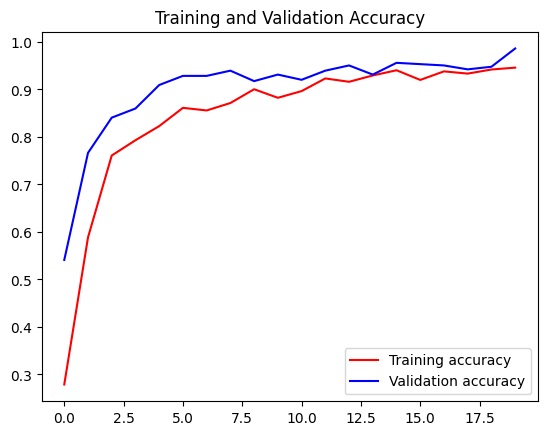

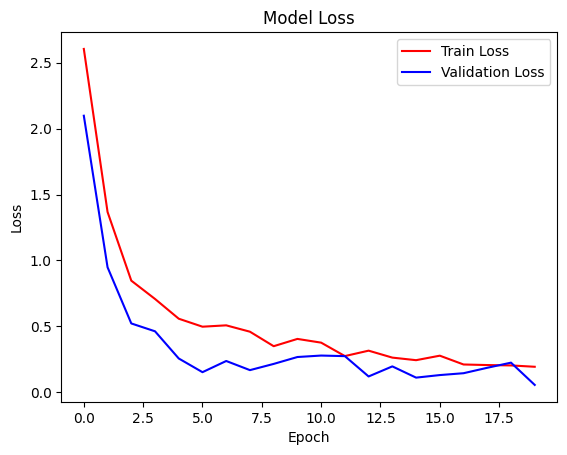

In [ ]:
import matplotlib.pyplot as plt

def plot_train_history(history):
    # Summarize history for accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    # Jika ada history untuk testing (misalnya 'test_accuracy' dan 'test_loss')
    # Tambahkan logika untuk mengaksesnya
    test_acc = history.history.get('test_accuracy')
    test_loss = history.history.get('test_loss')

    epochs = range(len(acc))

    # Plotting Training and Validation Accuracy
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    if test_acc is not None:
        plt.plot(epochs, test_acc, 'g', label='Testing accuracy')  # Add testing accuracy line if available
    plt.title('Training and Validation Accuracy')
    plt.legend(loc=0)
    plt.figure()

    # Plotting Training and Validation Loss
    plt.plot(epochs, loss, 'r', label='Train Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    if test_loss is not None:
        plt.plot(epochs, test_loss, 'g', label='Testing Loss')  # Add testing loss line if available
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc=0)
    plt.show()

# Call the function to plot the history
plot_train_history(history)


In [ ]:
model.save('modelasl.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


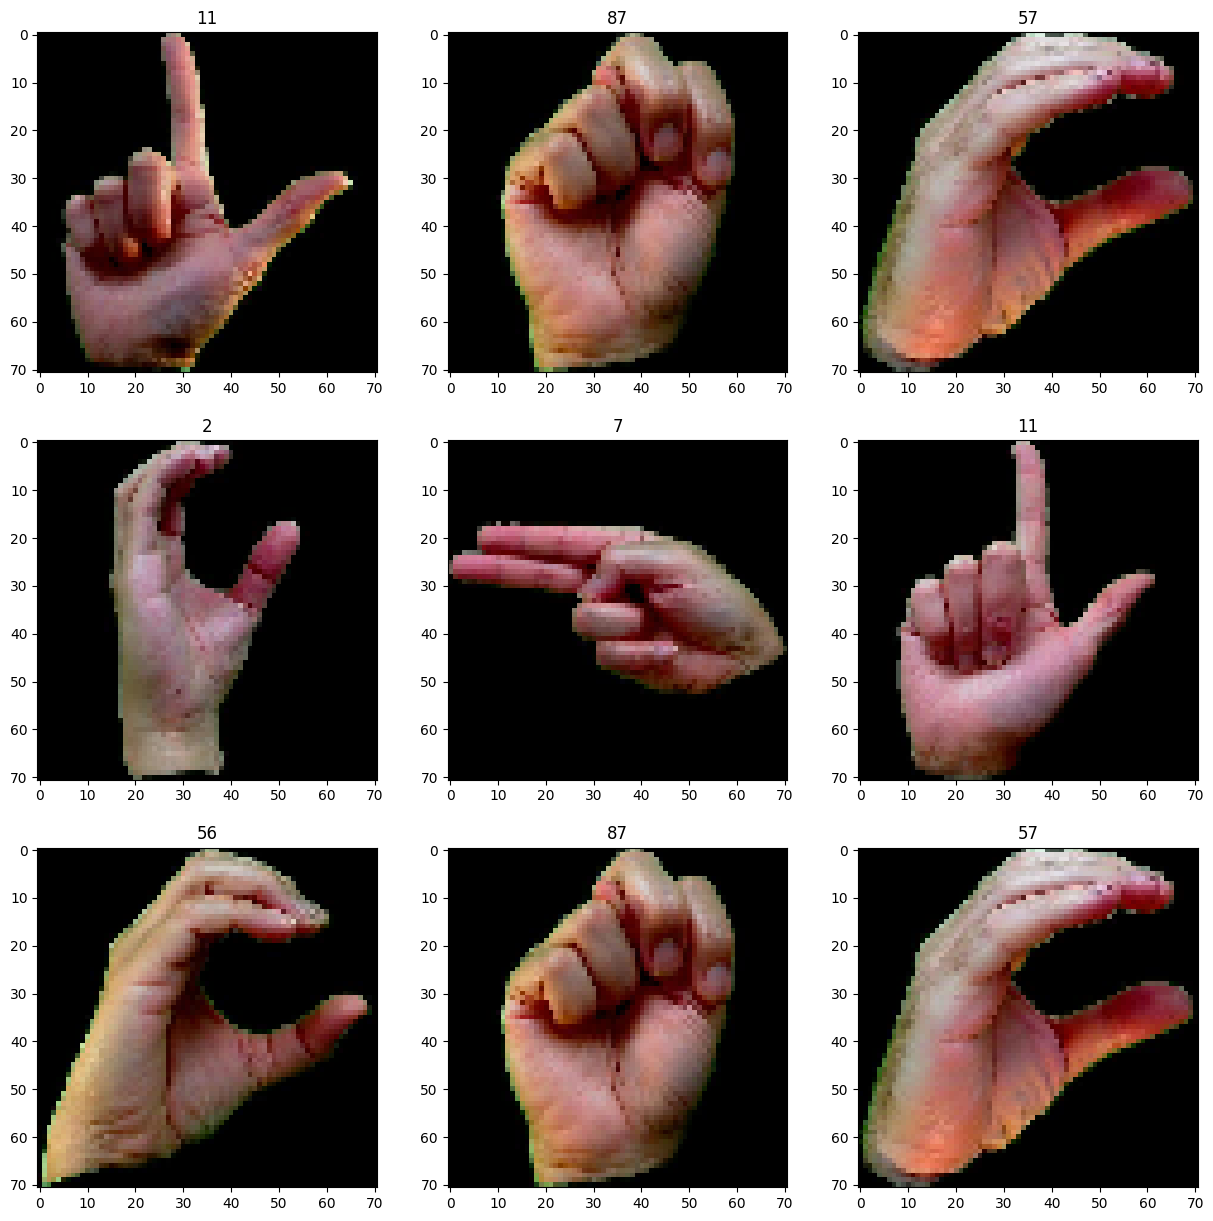

In [ ]:
import numpy as np
import random # Import the random module
import matplotlib.pyplot as plt

label_names = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4:'e', 5: 'f', 6: 'g', 7: 'h', 8:'i', 9:'j', 10:'k', 11: 'l', 12:'m', 13:'n', 14:'o', 15:'p', 16:'q', 17:'r', 18:'s', 19:'t', 20:'u', 21:'v', 22: 'w', 23:'x', 24:'y', 25:'z'}

def run_prediction(testing_generator): # Pass testing_generator as an argument
    n = 331
    plt.figure(figsize=(15, 15))
    for i in range(9):
        plt.subplot(n)
        idx = random.randint(0, len(testing_generator)-1)
        predict = model.predict(testing_generator[idx][0])
        plt.imshow(testing_generator[idx][0][0])
        plt.title(np.argmax(predict))
        n += 1

# Call the function with test_generator, assuming it's the intended generator
run_prediction(test_generator) # Changed testing_generator to test_generator

In [ ]:
from keras.models import load_model

# load model
model = load_model('modelasl.h5')

In [ ]:
# new_model= tf.keras.models.load_model(model)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with open("model_asltflite.tflite", 'wb') as f:
  f.write(tflite_model)
  print("Saved model to disk")

Saved artifact at '/tmp/tmpkjkar4by'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 71, 71, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  140434611174944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140434611202960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140434611204896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140434611198384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140434611200672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140434611199088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140434611193632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140434611205600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140434611206480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140434611207536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140434611205072:

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction for /content/drive/MyDrive/asl_dataset/a/hand1_a_bot_seg_1_cropped.jpeg: a
Confidence: 99.99%



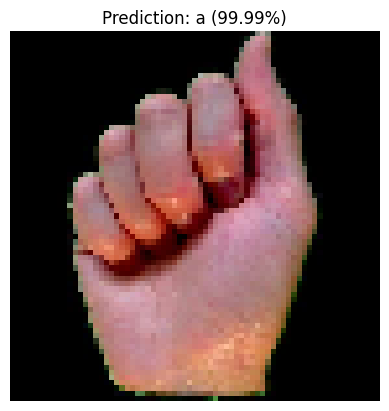

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/a/hand1_a_bot_seg_2_cropped.jpeg: a
Confidence: 99.98%



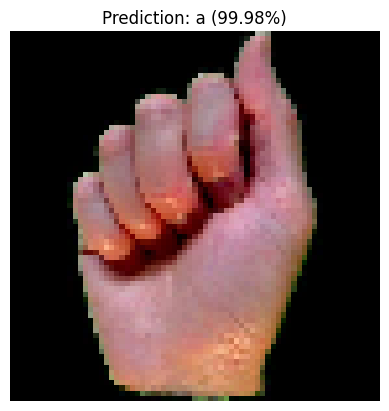

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/a/hand3_a_dif_seg_1_cropped.jpeg: a
Confidence: 99.99%



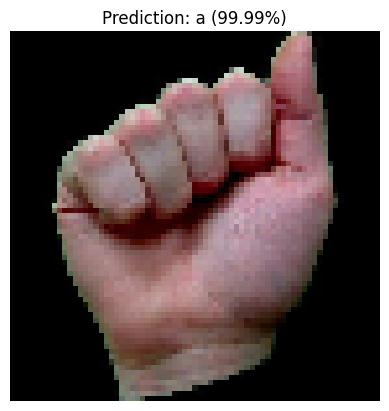

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/b/hand1_b_bot_seg_1_cropped.jpeg: b
Confidence: 100.00%



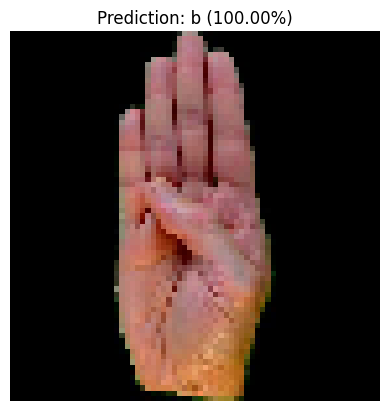

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/b/hand1_b_bot_seg_2_cropped.jpeg: b
Confidence: 100.00%



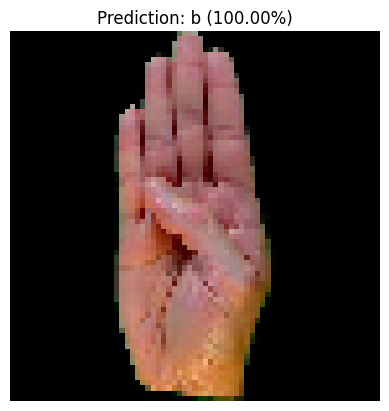

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/b/hand1_b_left_seg_4_cropped.jpeg: b
Confidence: 100.00%



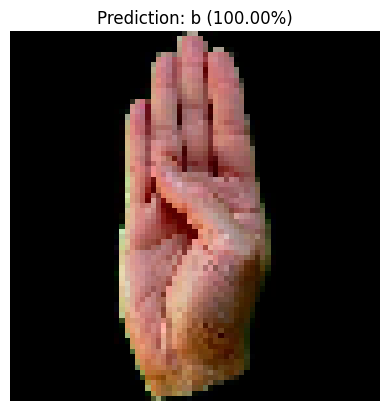

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/c/hand1_c_bot_seg_1_cropped.jpeg: c
Confidence: 100.00%



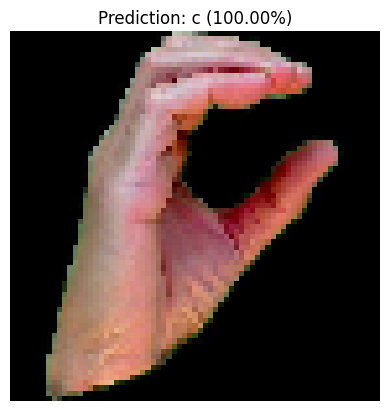

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/c/hand1_c_dif_seg_2_cropped.jpeg: c
Confidence: 100.00%



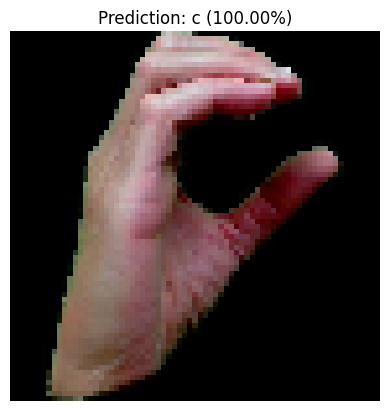

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction for /content/drive/MyDrive/asl_dataset/c/hand1_c_left_seg_1_cropped.jpeg: c
Confidence: 100.00%



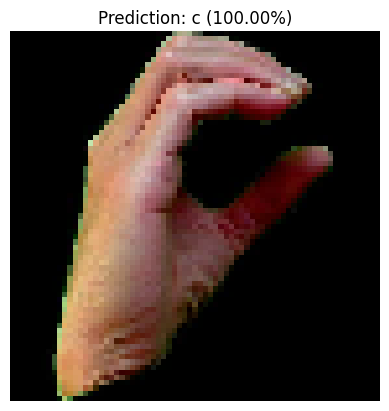

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/d/hand1_d_bot_seg_1_cropped.jpeg: d
Confidence: 100.00%



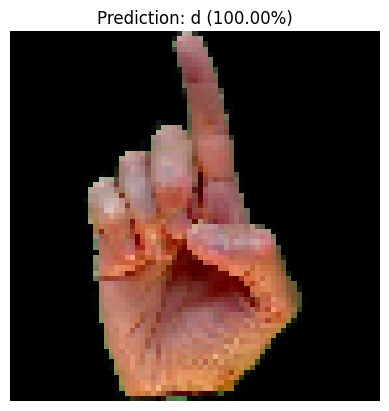

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/d/hand1_d_dif_seg_1_cropped.jpeg: d
Confidence: 100.00%



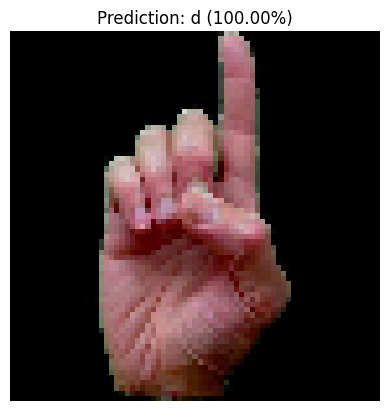

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/d/hand1_d_left_seg_1_cropped.jpeg: d
Confidence: 100.00%



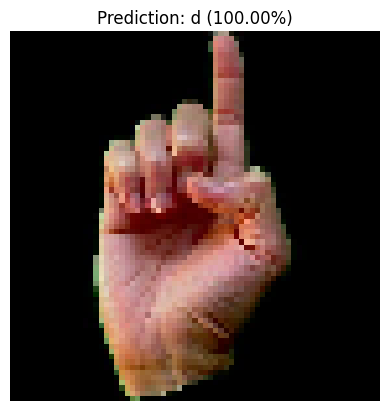

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/e/hand1_e_bot_seg_1_cropped.jpeg: e
Confidence: 100.00%



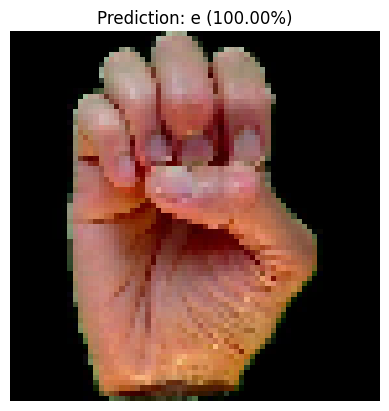

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/e/hand1_e_dif_seg_3_cropped.jpeg: e
Confidence: 100.00%



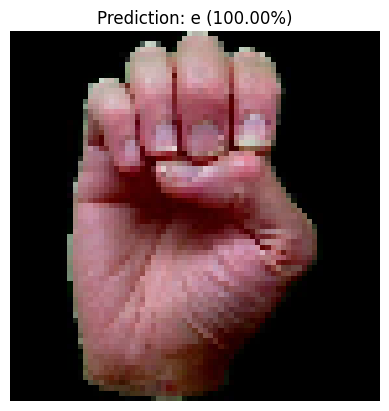

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/e/hand2_e_bot_seg_1_cropped.jpeg: e
Confidence: 100.00%



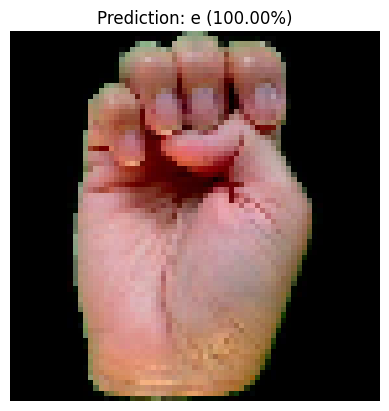

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/f/hand1_f_bot_seg_1_cropped.jpeg: f
Confidence: 100.00%



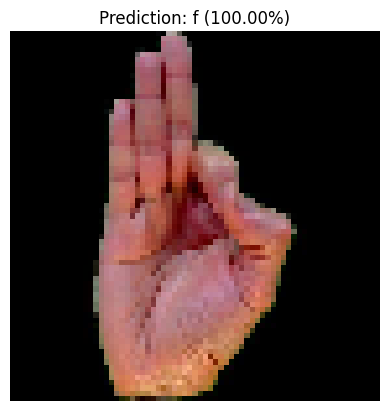

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/f/hand1_f_dif_seg_4_cropped.jpeg: f
Confidence: 100.00%



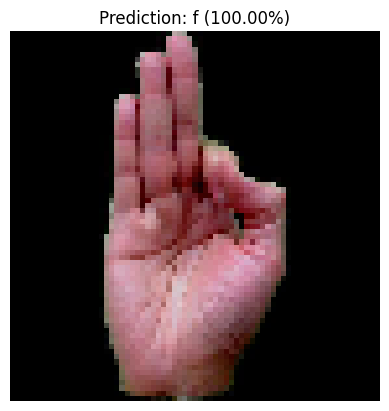

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/f/hand1_f_top_seg_3_cropped.jpeg: f
Confidence: 100.00%



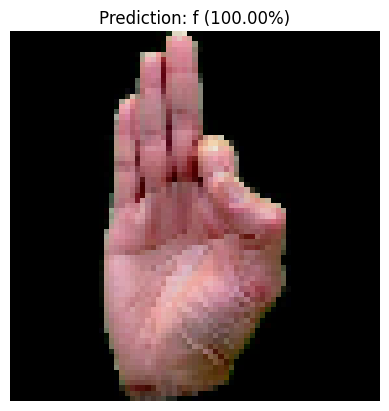

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for /content/drive/MyDrive/asl_dataset/g/hand1_g_bot_seg_2_cropped.jpeg: g
Confidence: 100.00%



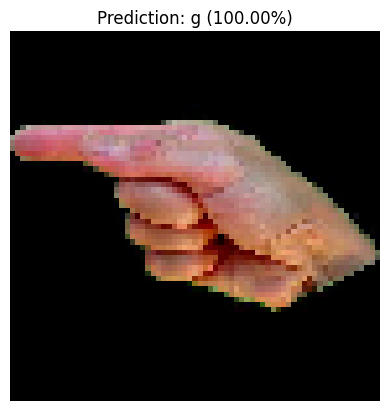

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/g/hand1_g_dif_seg_1_cropped.jpeg: g
Confidence: 100.00%



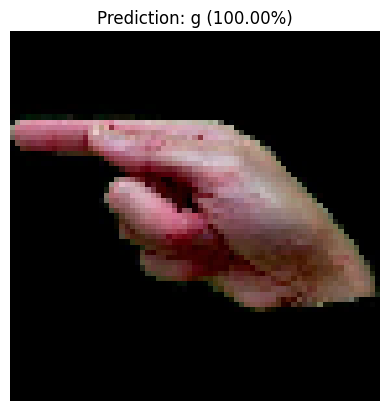

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/g/hand1_g_right_seg_1_cropped.jpeg: g
Confidence: 100.00%



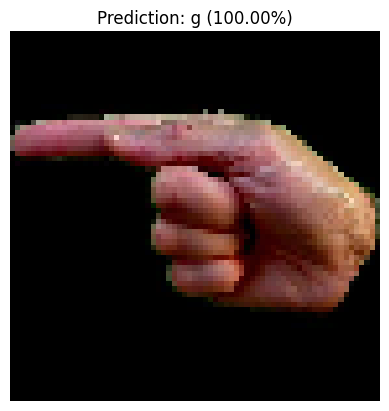

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/g/hand2_g_bot_seg_3_cropped.jpeg: g
Confidence: 100.00%



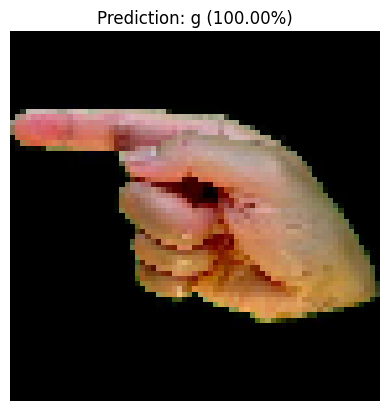

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/h/hand1_h_bot_seg_2_cropped.jpeg: h
Confidence: 100.00%



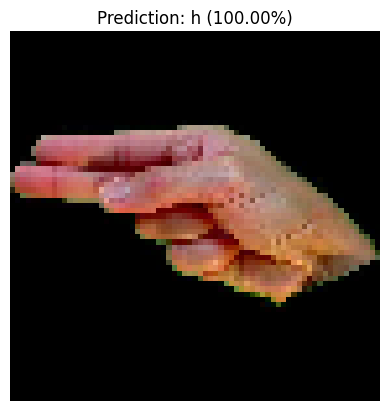

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/h/hand1_h_dif_seg_4_cropped.jpeg: h
Confidence: 100.00%



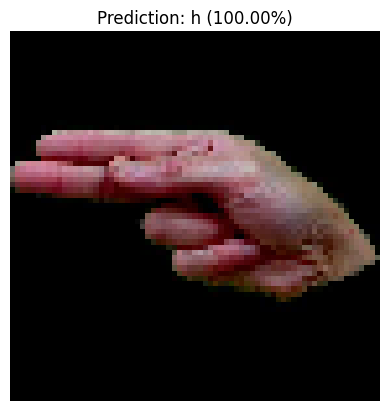

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/h/hand1_h_top_seg_1_cropped.jpeg: h
Confidence: 100.00%



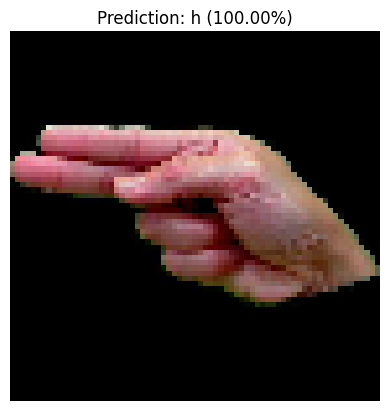

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction for /content/drive/MyDrive/asl_dataset/h/hand2_h_dif_seg_3_cropped.jpeg: h
Confidence: 100.00%



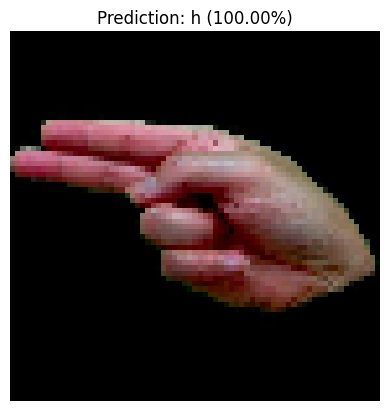

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/i/hand1_i_bot_seg_1_cropped.jpeg: i
Confidence: 100.00%



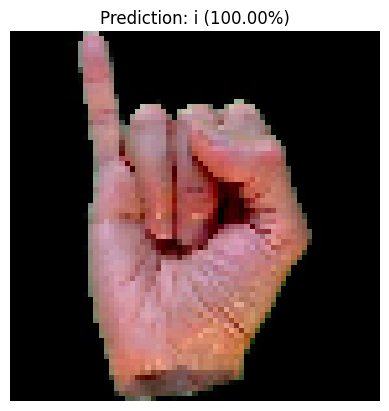

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/i/hand1_i_left_seg_1_cropped.jpeg: i
Confidence: 100.00%



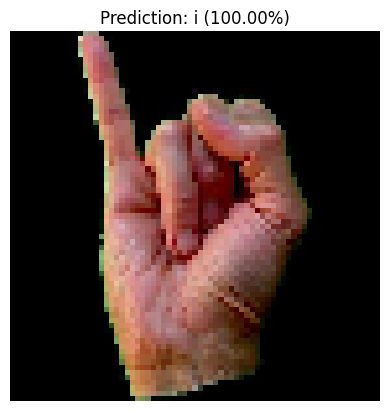

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for /content/drive/MyDrive/asl_dataset/i/hand1_i_top_seg_2_cropped.jpeg: i
Confidence: 100.00%



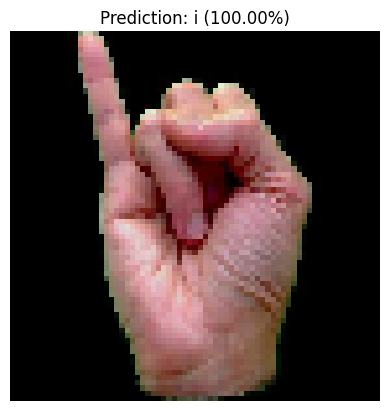

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/i/hand2_i_bot_seg_4_cropped.jpeg: i
Confidence: 100.00%



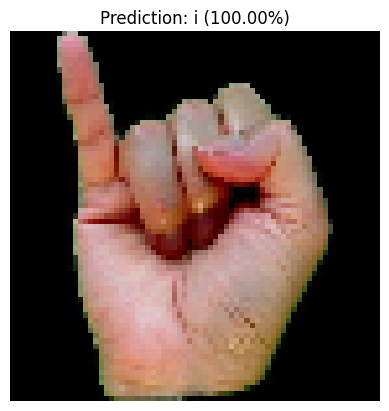

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction for /content/drive/MyDrive/asl_dataset/j/hand1_j_bot_seg_5_cropped.jpeg: j
Confidence: 100.00%



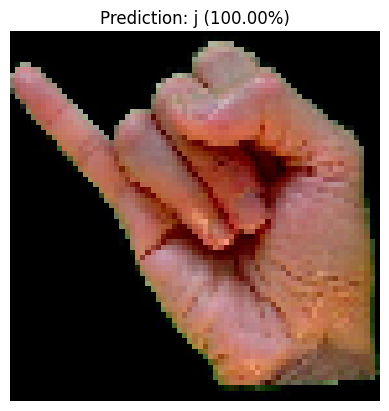

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/j/hand2_j_top_seg_5_cropped.jpeg: j
Confidence: 100.00%



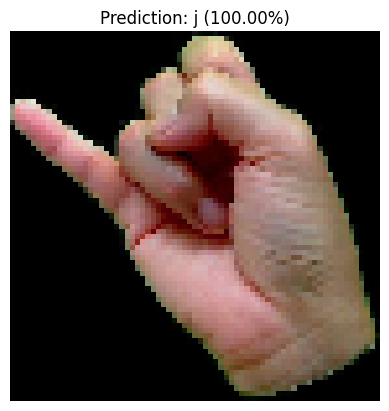

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for /content/drive/MyDrive/asl_dataset/k/hand1_k_bot_seg_2_cropped.jpeg: k
Confidence: 100.00%



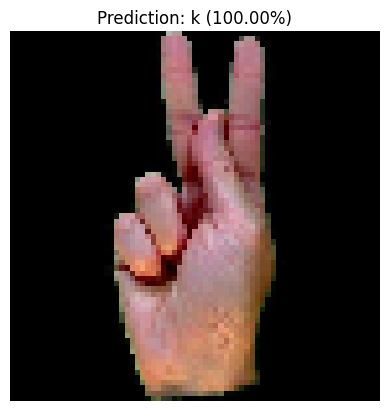

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/k/hand2_k_dif_seg_2_cropped.jpeg: k
Confidence: 100.00%



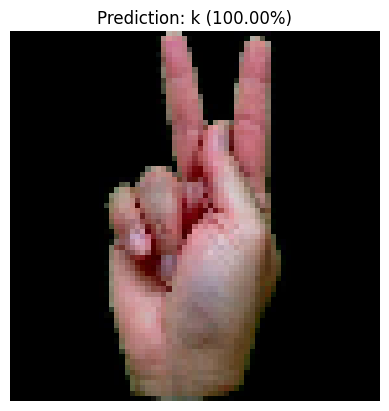

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/k/hand4_k_bot_seg_4_cropped.jpeg: k
Confidence: 100.00%



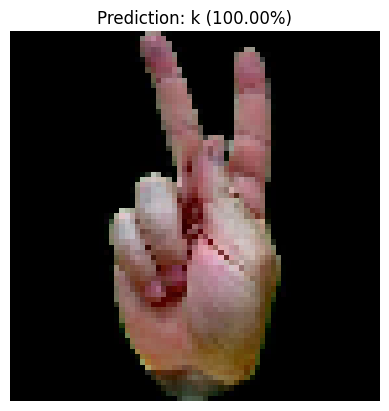

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/l/hand1_l_bot_seg_2_cropped.jpeg: l
Confidence: 100.00%



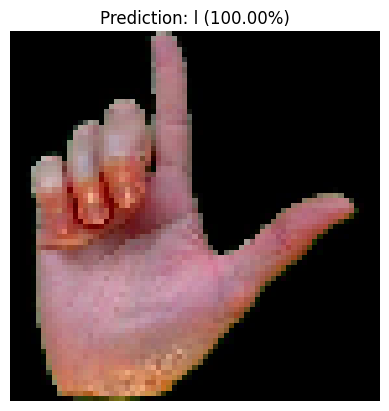

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/l/hand2_l_right_seg_4_cropped.jpeg: l
Confidence: 100.00%



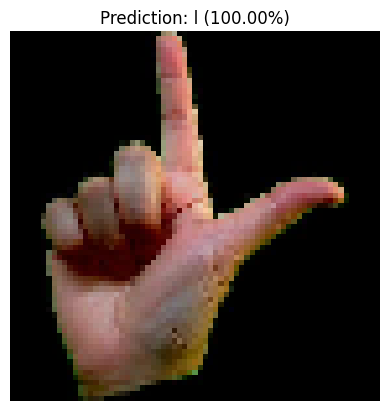

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/l/hand5_l_dif_seg_4_cropped.jpeg: l
Confidence: 100.00%



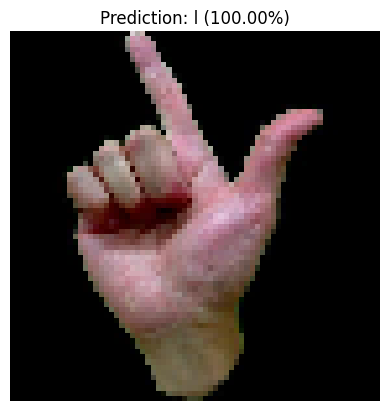

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/m/hand1_m_bot_seg_1_cropped.jpeg: m
Confidence: 100.00%



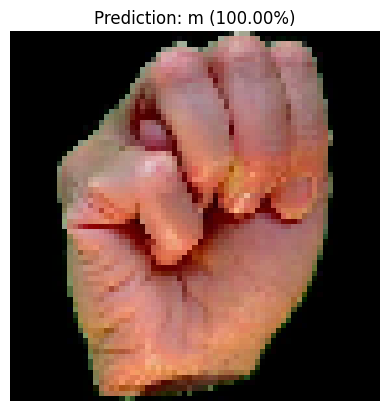

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/m/hand1_m_right_seg_2_cropped.jpeg: m
Confidence: 99.99%



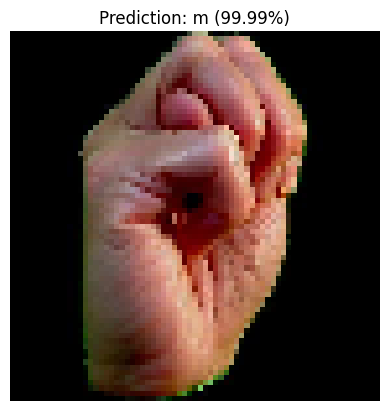

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for /content/drive/MyDrive/asl_dataset/m/hand3_m_dif_seg_3_cropped.jpeg: n
Confidence: 62.08%



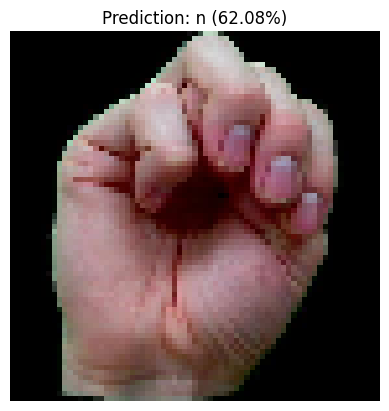

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction for /content/drive/MyDrive/asl_dataset/n/hand1_n_bot_seg_2_cropped.jpeg: n
Confidence: 99.91%



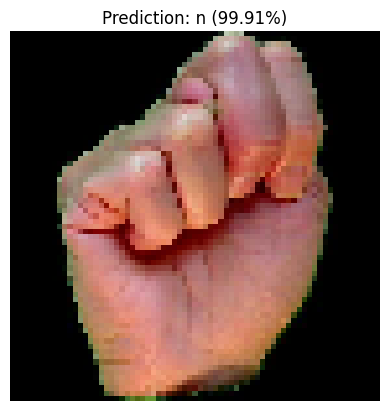

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction for /content/drive/MyDrive/asl_dataset/n/hand2_n_dif_seg_2_cropped.jpeg: n
Confidence: 97.84%



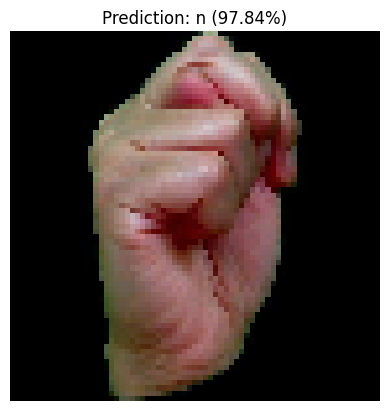

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction for /content/drive/MyDrive/asl_dataset/n/hand5_n_dif_seg_3_cropped.jpeg: n
Confidence: 99.41%



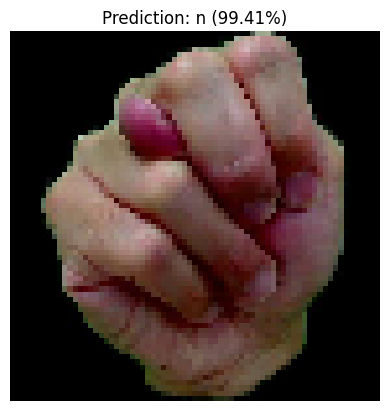

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction for /content/drive/MyDrive/asl_dataset/o/hand1_o_dif_seg_4_cropped.jpeg: o
Confidence: 99.99%



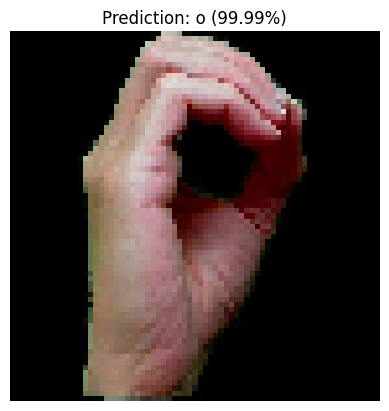

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction for /content/drive/MyDrive/asl_dataset/o/hand2_o_dif_seg_2_cropped.jpeg: o
Confidence: 100.00%



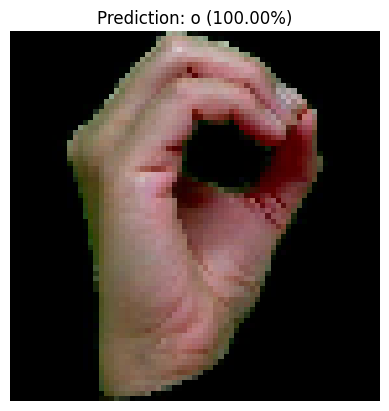

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for /content/drive/MyDrive/asl_dataset/o/hand5_o_bot_seg_4_cropped.jpeg: o
Confidence: 100.00%



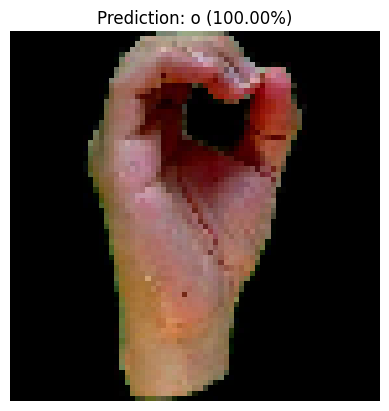

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction for /content/drive/MyDrive/asl_dataset/p/hand1_p_bot_seg_3_cropped.jpeg: p
Confidence: 100.00%



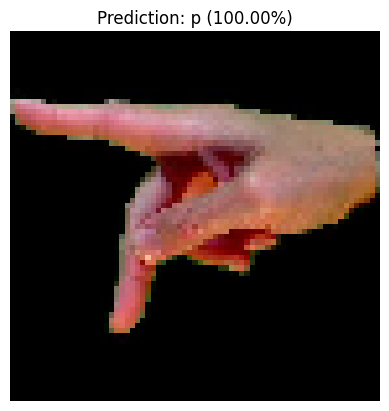

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for /content/drive/MyDrive/asl_dataset/p/hand2_p_left_seg_4_cropped.jpeg: p
Confidence: 99.97%



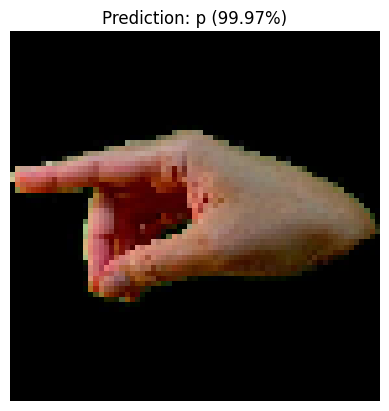

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction for /content/drive/MyDrive/asl_dataset/p/hand5_p_dif_seg_5_cropped.jpeg: p
Confidence: 99.99%



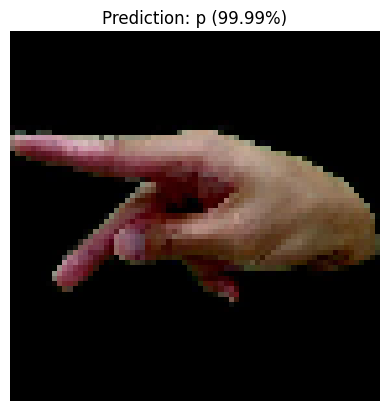

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction for /content/drive/MyDrive/asl_dataset/q/hand1_q_bot_seg_2_cropped.jpeg: q
Confidence: 100.00%



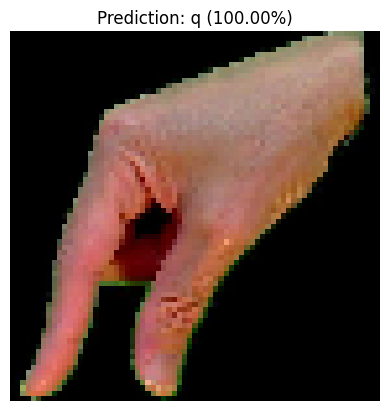

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for /content/drive/MyDrive/asl_dataset/q/hand2_q_right_seg_5_cropped.jpeg: q
Confidence: 100.00%



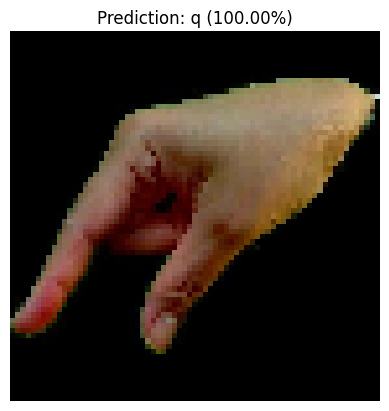

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction for /content/drive/MyDrive/asl_dataset/q/hand5_q_dif_seg_5_cropped.jpeg: q
Confidence: 100.00%



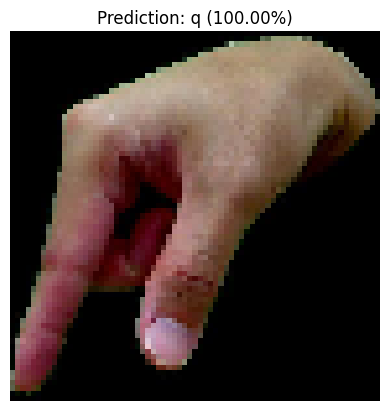

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction for /content/drive/MyDrive/asl_dataset/r/hand1_r_bot_seg_5_cropped.jpeg: r
Confidence: 99.98%



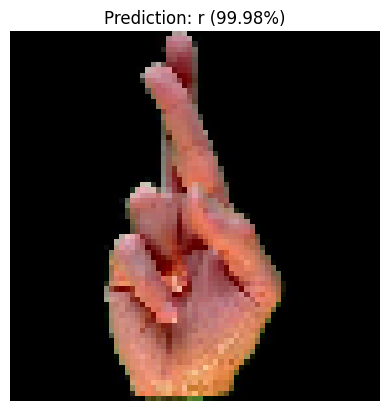

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for /content/drive/MyDrive/asl_dataset/r/hand1_r_top_seg_1_cropped.jpeg: r
Confidence: 99.99%



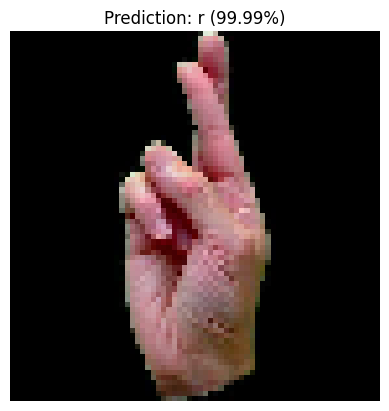

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for /content/drive/MyDrive/asl_dataset/r/hand5_r_dif_seg_1_cropped.jpeg: r
Confidence: 99.68%



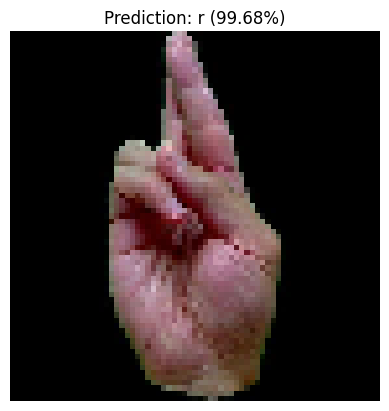

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction for /content/drive/MyDrive/asl_dataset/s/hand1_s_dif_seg_1_cropped.jpeg: s
Confidence: 99.99%



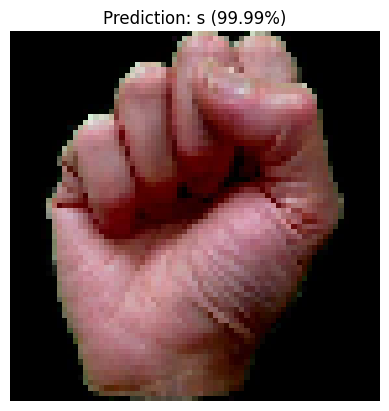

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for /content/drive/MyDrive/asl_dataset/s/hand2_s_dif_seg_2_cropped.jpeg: s
Confidence: 54.65%



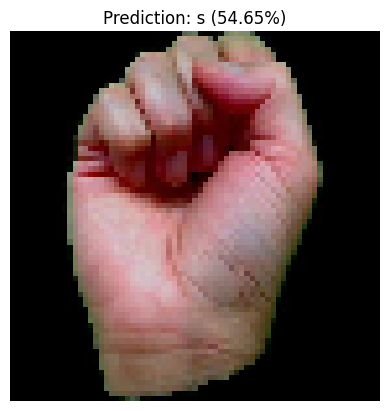

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction for /content/drive/MyDrive/asl_dataset/s/hand2_s_right_seg_3_cropped.jpeg: s
Confidence: 100.00%



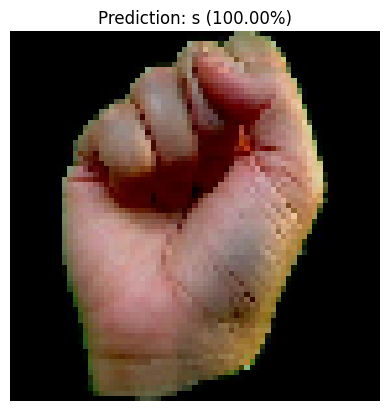

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/t/hand1_t_bot_seg_3_cropped.jpeg: t
Confidence: 100.00%



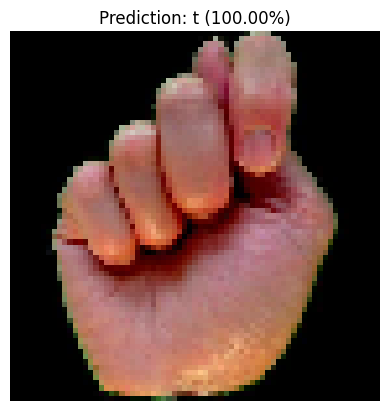

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction for /content/drive/MyDrive/asl_dataset/t/hand1_t_top_seg_2_cropped.jpeg: t
Confidence: 99.67%



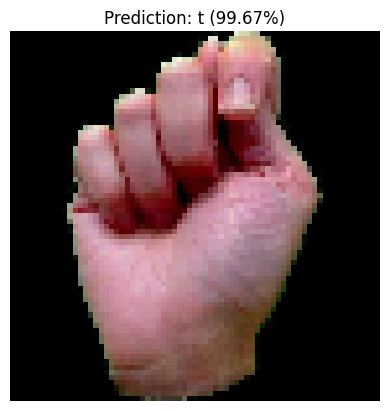

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction for /content/drive/MyDrive/asl_dataset/t/hand3_t_dif_seg_1_cropped.jpeg: t
Confidence: 99.98%



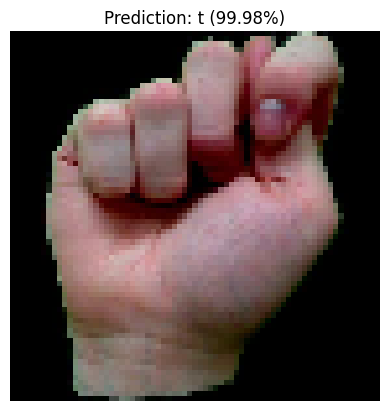

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/u/hand1_u_bot_seg_5_cropped.jpeg: u
Confidence: 100.00%



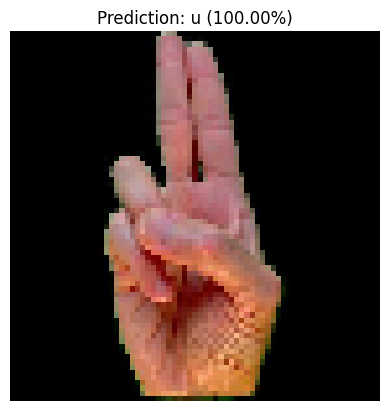

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/u/hand2_u_dif_seg_5_cropped.jpeg: u
Confidence: 100.00%



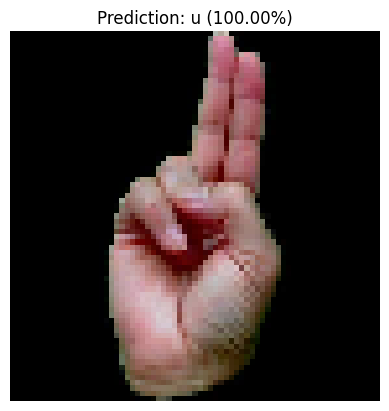

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/u/hand5_u_dif_seg_2_cropped.jpeg: u
Confidence: 100.00%



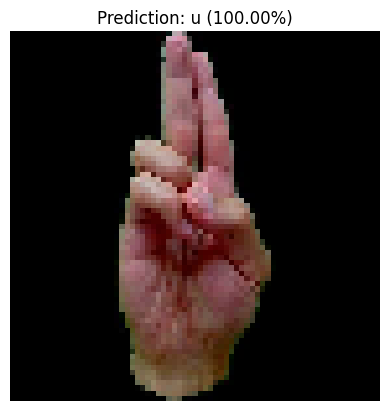

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction for /content/drive/MyDrive/asl_dataset/v/hand1_v_bot_seg_5_cropped.jpeg: v
Confidence: 100.00%



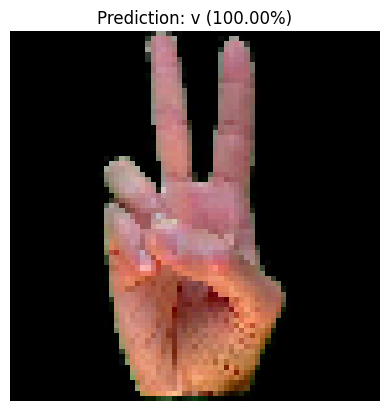

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction for /content/drive/MyDrive/asl_dataset/v/hand1_v_top_seg_3_cropped.jpeg: v
Confidence: 99.98%



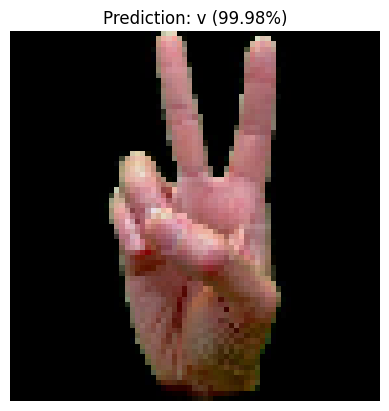

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/v/hand5_v_bot_seg_5_cropped.jpeg: v
Confidence: 98.49%



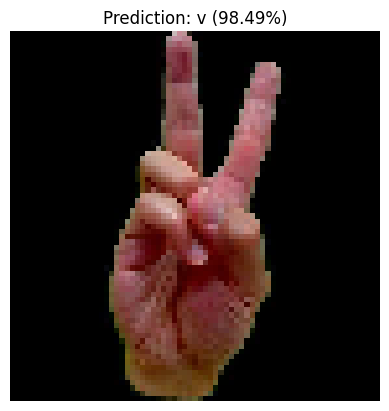

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for /content/drive/MyDrive/asl_dataset/w/hand1_w_bot_seg_5_cropped.jpeg: w
Confidence: 100.00%



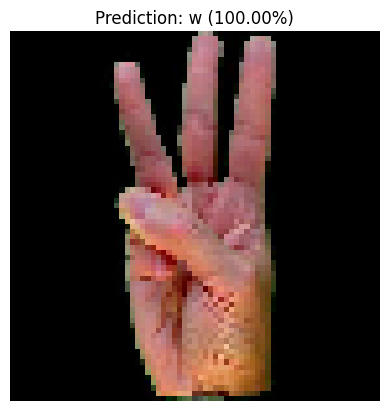

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/w/hand2_w_left_seg_4_cropped.jpeg: w
Confidence: 99.98%



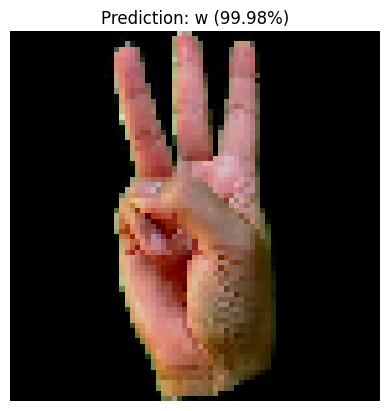

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/w/hand5_w_dif_seg_2_cropped.jpeg: w
Confidence: 99.97%



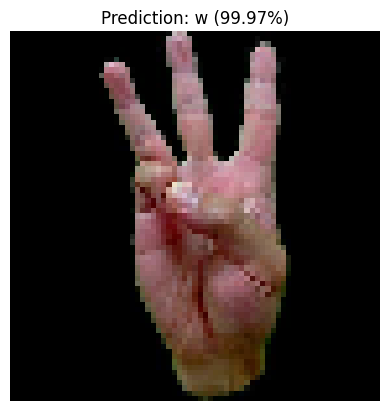

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction for /content/drive/MyDrive/asl_dataset/x/hand1_x_bot_seg_4_cropped.jpeg: x
Confidence: 100.00%



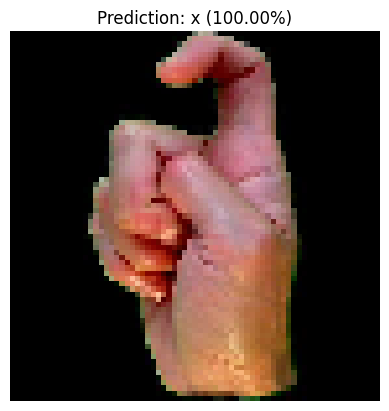

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction for /content/drive/MyDrive/asl_dataset/x/hand1_x_top_seg_2_cropped.jpeg: x
Confidence: 100.00%



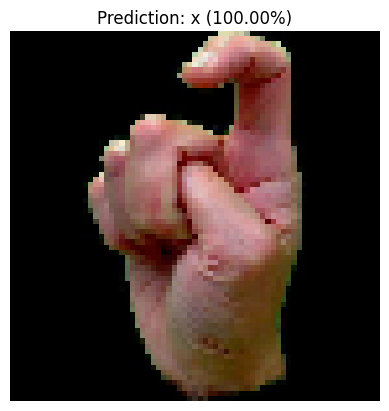

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for /content/drive/MyDrive/asl_dataset/x/hand5_x_dif_seg_1_cropped.jpeg: x
Confidence: 100.00%



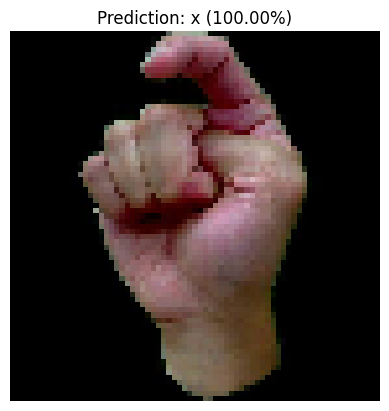

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for /content/drive/MyDrive/asl_dataset/y/hand1_y_dif_seg_1_cropped.jpeg: y
Confidence: 100.00%



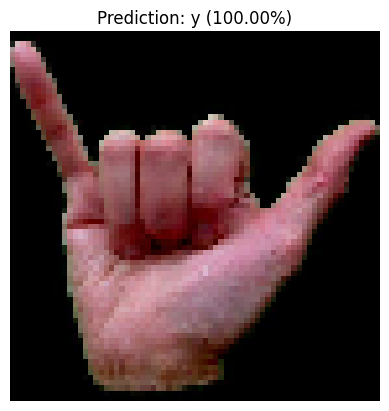

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for /content/drive/MyDrive/asl_dataset/y/hand2_y_dif_seg_4_cropped.jpeg: y
Confidence: 100.00%



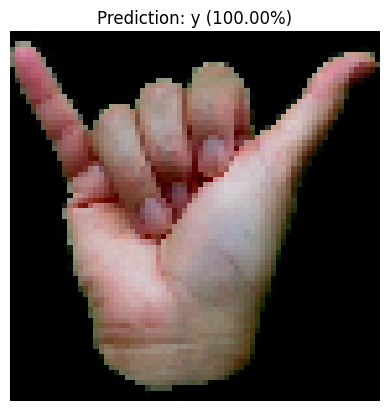

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for /content/drive/MyDrive/asl_dataset/y/hand5_y_dif_seg_4_cropped.jpeg: y
Confidence: 100.00%



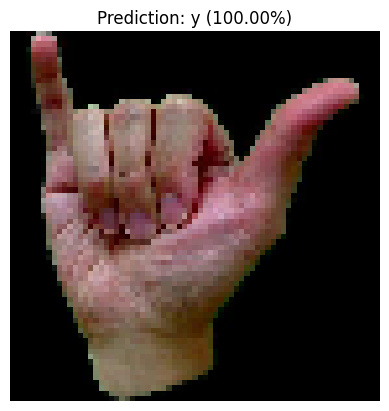

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/z/hand1_z_right_seg_5_cropped.jpeg: z
Confidence: 100.00%



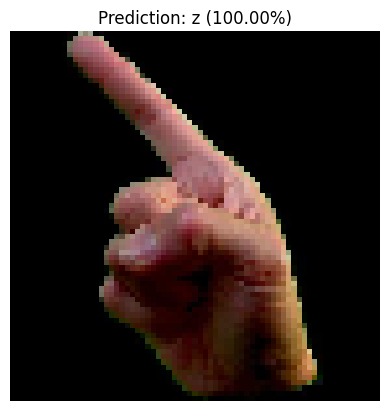

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/z/hand3_z_dif_seg_2_cropped.jpeg: z
Confidence: 99.98%



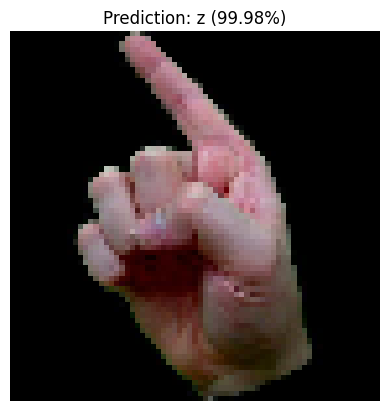

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction for /content/drive/MyDrive/asl_dataset/z/hand5_z_dif_seg_4_cropped.jpeg: z
Confidence: 92.17%



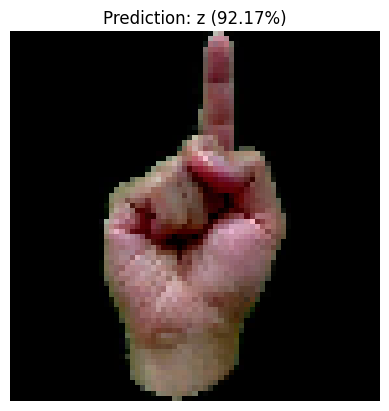

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt


file_paths = [
    '/content/drive/MyDrive/asl_dataset/a/hand1_a_bot_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/a/hand1_a_bot_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/a/hand3_a_dif_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/b/hand1_b_bot_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/b/hand1_b_bot_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/b/hand1_b_left_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/c/hand1_c_bot_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/c/hand1_c_dif_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/c/hand1_c_left_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/d/hand1_d_bot_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/d/hand1_d_dif_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/d/hand1_d_left_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/e/hand1_e_bot_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/e/hand1_e_dif_seg_3_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/e/hand2_e_bot_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/f/hand1_f_bot_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/f/hand1_f_dif_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/f/hand1_f_top_seg_3_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/g/hand1_g_bot_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/g/hand1_g_dif_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/g/hand1_g_right_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/g/hand2_g_bot_seg_3_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/h/hand1_h_bot_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/h/hand1_h_dif_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/h/hand1_h_top_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/h/hand2_h_dif_seg_3_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/i/hand1_i_bot_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/i/hand1_i_left_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/i/hand1_i_top_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/i/hand2_i_bot_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/j/hand1_j_bot_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/j/hand2_j_top_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/k/hand1_k_bot_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/k/hand2_k_dif_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/k/hand4_k_bot_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/l/hand1_l_bot_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/l/hand2_l_right_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/l/hand5_l_dif_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/m/hand1_m_bot_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/m/hand1_m_right_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/m/hand3_m_dif_seg_3_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/n/hand1_n_bot_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/n/hand2_n_dif_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/n/hand5_n_dif_seg_3_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/o/hand1_o_dif_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/o/hand2_o_dif_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/o/hand5_o_bot_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/p/hand1_p_bot_seg_3_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/p/hand2_p_left_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/p/hand5_p_dif_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/q/hand1_q_bot_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/q/hand2_q_right_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/q/hand5_q_dif_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/r/hand1_r_bot_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/r/hand1_r_top_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/r/hand5_r_dif_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/s/hand1_s_dif_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/s/hand2_s_dif_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/s/hand2_s_right_seg_3_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/t/hand1_t_bot_seg_3_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/t/hand1_t_top_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/t/hand3_t_dif_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/u/hand1_u_bot_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/u/hand2_u_dif_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/u/hand5_u_dif_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/v/hand1_v_bot_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/v/hand1_v_top_seg_3_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/v/hand5_v_bot_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/w/hand1_w_bot_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/w/hand2_w_left_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/w/hand5_w_dif_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/x/hand1_x_bot_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/x/hand1_x_top_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/x/hand5_x_dif_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/y/hand1_y_dif_seg_1_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/y/hand2_y_dif_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/y/hand5_y_dif_seg_4_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/z/hand1_z_right_seg_5_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/z/hand3_z_dif_seg_2_cropped.jpeg',
    '/content/drive/MyDrive/asl_dataset/z/hand5_z_dif_seg_4_cropped.jpeg'

    # Add paths for the remaining 18 photos
    # ...
]
# Iterasi melalui semua file
for path in file_paths:
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue

    try:
        # Load image and resize
        img = image.load_img(path, target_size=(71, 71))

        # Convert image to array and rescale
        x = image.img_to_array(img) / 255.0
        x = np.expand_dims(x, axis=0)

        # Make predictions
        classes = model.predict(x, batch_size=1)
        predicted_index = np.argmax(classes[0])

        # Handle invalid prediction index
        if predicted_index in label_names:
            prediction_name = label_names[predicted_index]
        else:
            prediction_name = "Unknown"

        # Get the confidence percentage
        confidence_percentage = np.max(classes[0]) * 100

  # Print the results for each image
        print(f"Prediction for {path}: {prediction_name}")
        print(f"Confidence: {confidence_percentage:.2f}%\n")

        # Optionally, display the image
        plt.imshow(img)
        plt.title(f"Prediction: {prediction_name} ({confidence_percentage:.2f}%)")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error processing {path}: {e}")